In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

sns.set();

%matplotlib inline

In [2]:
df = pd.read_csv("2015StreetTreesCensus_TREES.csv")
df.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.768749
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.837379
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.891267
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.253136
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.425999


In [146]:
df.shape

(683788, 42)

In [147]:
df.dropna().shape

(652118, 42)

In [3]:
df.columns

Index(['created_at', 'tree_id', 'block_id', 'the_geom', 'tree_dbh',
       'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trnk_wire', 'trnk_light', 'trnk_other',
       'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'Latitude',
       'longitude', 'x_sp', 'y_sp'],
      dtype='object')

In [4]:
df.shape

(683788, 42)

In [196]:
class eda:
    def __init__(self, data):
        self.df = data
    
    def plot(self, col1, col2, block):
        df = self.df
#         plt.scatter(df[col1], df[col2], c = df['boroname'])
#         plt.xlabel(col1)
#         plt.ylabel(col2)
#         plt.title("%s vs %s" %(col1,col2))
        sns.lmplot(col1, col2, data=df, hue=block, fit_reg=False, scatter_kws={"s": .1})
    def plot_noblock(self, new_df, col1, col2):
        sns.lmplot(col1, col2, data=new_df, fit_reg=False)
        
    def boxplot(self, col1, col2):
        df = self.df
        sns.boxplot(x=col1, y=col2, data= df)
    
    def hist(self, col):
        plt.hist(df[col])
    
    def check_corr(self, col):
        return self[col].corr()
        

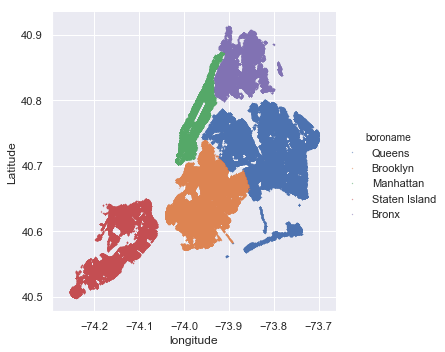

In [6]:
ed = eda(df)
ed.plot('longitude', 'Latitude','boroname')

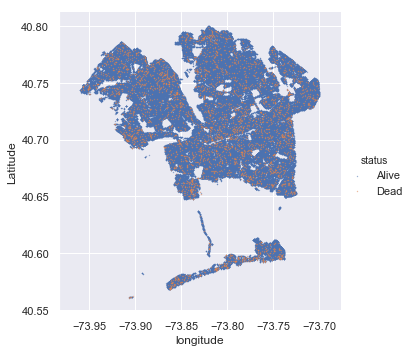

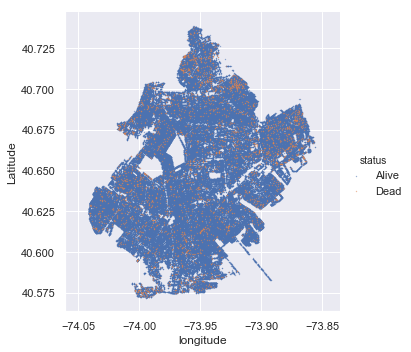

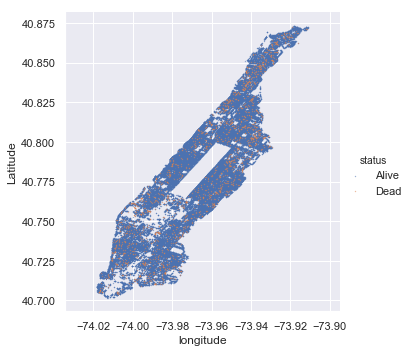

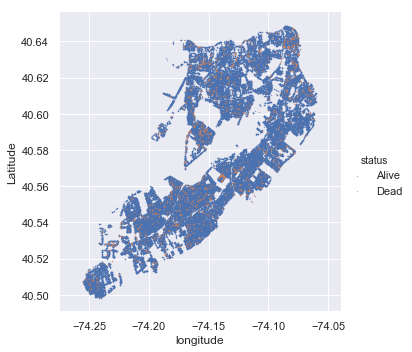

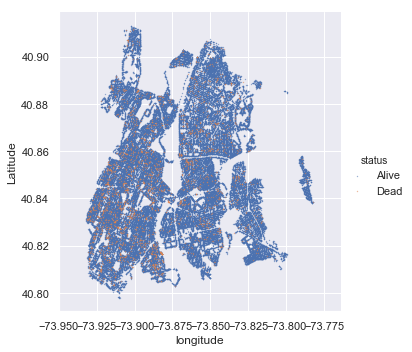

In [131]:
for name in df.boroname.unique():
    df_temp = df.loc[df.boroname == name, :].loc[df.status != 'Stump', :]
    eda_temp = eda(df_temp)
    eda_temp.plot('longitude', 'Latitude','status')

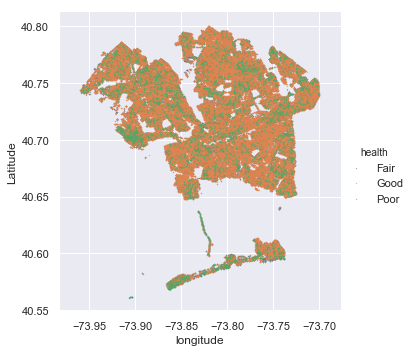

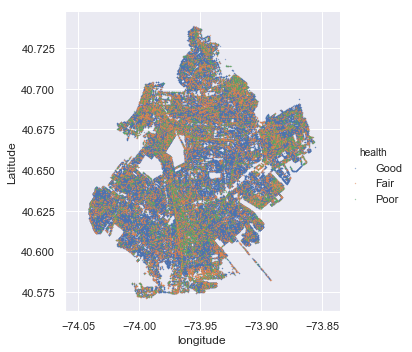

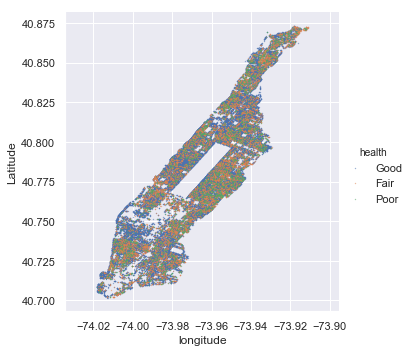

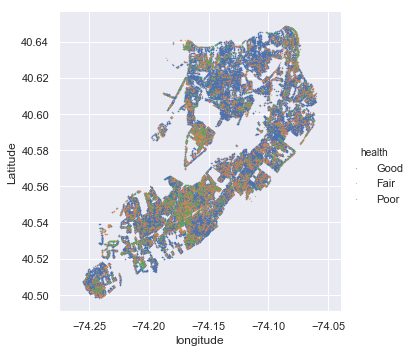

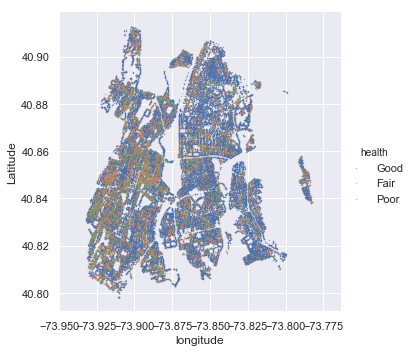

In [126]:
for name in df.boroname.unique():
    df_temp = df.loc[df.boroname == name,:]
    eda_temp = eda(df_temp)
    eda_temp.plot('longitude', 'Latitude','health')

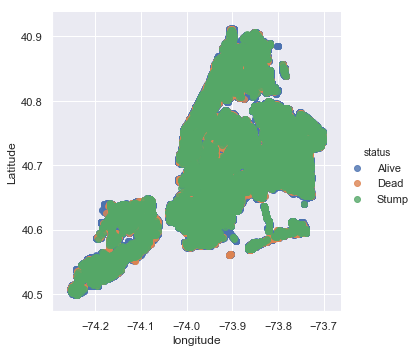

In [110]:
ed.plot('longitude', 'Latitude','status')

In [116]:
#ed.plot_noblock(df.loc[df.status=='Alive'], 'longitude', 'Latitude')

In [45]:
svm = SVC(kernel = 'poly')
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)


def train_test(model, X, y, multiclass = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    if multiclass == False:
        return(np.mean(y_test!=y_pred), roc_auc_score(y_test, y_prob[:,1]))
    else:
        return(classification_report(y_test, y_pred))

#logistic regression on geolocation only
train_test(log, df.loc[df.status != 'Stump',['longitude','Latitude']], 
           df.status.loc[df.status != 'Stump'])

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.020739039383908666, 0.5169118446337606)

In [190]:
df1 = df.dropna().loc[df.status == 'Alive']

In [195]:
def train_test_block(model, X, y, block_col, multiclass = False):
    for region in X[block_col].unique():
        X_block = X.loc[X[block_col] == region,:]
        X_block = X_block.drop(columns = block_col)
        y_block = y.loc[X[block_col] == region]
        X_train, X_test, y_train, y_test = train_test_split(X_block, y_block, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)
        if multiclass == False:
            print(region, np.mean(y_test!=y_pred), roc_auc_score(y_test, y_prob[:,1]))
        else:
            print(region, classification_report(y_test, y_pred))

X_h = df1[['longitude','Latitude','tree_dbh', 'boroname']]
#X_h = pd.concat([pd.get_dummies(df1[['steward', 'sidewalk','curb_loc']]), 
#                 df1[['longitude','Latitude','tree_dbh', 'boroname']]], axis = 1)
y_h = df1.health.loc[df1.status == 'Alive'] 

            
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate = .5)
train_test_block(knn, X_h, y_h , 'boroname', True)


Queens               precision    recall  f1-score   support

        Fair       0.31      0.17      0.22      6799
        Good       0.84      0.94      0.89     38872
        Poor       0.34      0.04      0.07      1922

   micro avg       0.79      0.79      0.79     47593
   macro avg       0.50      0.38      0.39     47593
weighted avg       0.74      0.79      0.76     47593

Brooklyn               precision    recall  f1-score   support

        Fair       0.33      0.17      0.22      4947
        Good       0.84      0.94      0.89     27713
        Poor       0.38      0.05      0.08      1287

   micro avg       0.80      0.80      0.80     33947
   macro avg       0.51      0.39      0.40     33947
weighted avg       0.75      0.80      0.76     33947

Manhattan               precision    recall  f1-score   support

        Fair       0.30      0.19      0.23      2239
        Good       0.78      0.91      0.84      9514
        Poor       0.30      0.05      0.08      

In [161]:
train_test_block(ada, X_h, y_h , 'boroname', True)

Queens               precision    recall  f1-score   support

        Fair       0.49      0.00      0.01      6799
        Good       0.82      1.00      0.90     38872
        Poor       0.50      0.00      0.01      1922

   micro avg       0.82      0.82      0.82     47593
   macro avg       0.60      0.34      0.31     47593
weighted avg       0.76      0.82      0.74     47593

Brooklyn               precision    recall  f1-score   support

        Fair       0.44      0.00      0.01      4947
        Good       0.82      1.00      0.90     27713
        Poor       0.17      0.00      0.00      1287

   micro avg       0.82      0.82      0.82     33947
   macro avg       0.48      0.33      0.30     33947
weighted avg       0.74      0.82      0.74     33947

Manhattan               precision    recall  f1-score   support

        Fair       0.39      0.01      0.02      2239
        Good       0.76      1.00      0.86      9514
        Poor       0.33      0.01      0.01      

In [194]:
log = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial',class_weight = 'balanced') 
train_test_block(log, X_h, y_h , 'boroname', True)

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Queens               precision    recall  f1-score   support

        Fair       0.17      0.10      0.12      6799
        Good       0.83      0.45      0.58     38872
        Poor       0.05      0.60      0.09      1922

   micro avg       0.40      0.40      0.40     47593
   macro avg       0.35      0.38      0.27     47593
weighted avg       0.71      0.40      0.50     47593



/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Brooklyn               precision    recall  f1-score   support

        Fair       0.15      0.09      0.11      4947
        Good       0.84      0.45      0.59     27713
        Poor       0.05      0.67      0.10      1287

   micro avg       0.41      0.41      0.41     33947
   macro avg       0.35      0.40      0.27     33947
weighted avg       0.71      0.41      0.50     33947



/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Manhattan               precision    recall  f1-score   support

        Fair       0.20      0.17      0.18      2239
        Good       0.82      0.46      0.59      9514
        Poor       0.09      0.62      0.15       732

   micro avg       0.41      0.41      0.41     12485
   macro avg       0.37      0.42      0.31     12485
weighted avg       0.67      0.41      0.49     12485



/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Staten Island               precision    recall  f1-score   support

        Fair       0.16      0.22      0.19      2927
        Good       0.85      0.33      0.47     16539
        Poor       0.05      0.61      0.09       818

   micro avg       0.32      0.32      0.32     20284
   macro avg       0.35      0.39      0.25     20284
weighted avg       0.72      0.32      0.42     20284



/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Bronx               precision    recall  f1-score   support

        Fair       0.15      0.13      0.14      2266
        Good       0.86      0.39      0.53     13269
        Poor       0.05      0.68      0.09       582

   micro avg       0.36      0.36      0.36     16117
   macro avg       0.35      0.40      0.25     16117
weighted avg       0.73      0.36      0.46     16117



In [95]:
#logistic regression on geolocation and tree diameter
train_test(log, df.loc[df.status != 'Stump',['longitude','Latitude','tree_dbh']], 
           df.status.loc[df.status != 'Stump'])

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.020739039383908666, 0.7695517831463828)

In [92]:
#knn based on only geolocation
train_test(knn, df.loc[df.status != 'Stump',['longitude','Latitude']], 
           df.status.loc[df.status != 'Stump'])

(0.021392060167983968, 0.6251759179474983)

In [103]:
#knn based on geolocation and tree diameter
#notice there isn't much improvement
train_test(knn, df.loc[df.status != 'Stump',['longitude','Latitude','tree_dbh']], 
           df.status.loc[df.status != 'Stump'])

(0.021692299608938127, 0.6389132389055914)

In [90]:
# testing best k parameter based on only geolocation
for k in tqdm_notebook(range(20)):
    knn_k = KNeighborsClassifier(n_neighbors=k+1)
    
    print([k+1, train_test(knn_k, df.loc[df.status != 'Stump',['longitude','Latitude']], 
           df.status.loc[df.status != 'Stump'])])

    

[1, (0.035600891711139636, 0.5687548361588286)]
[2, (0.021279470377626158, 0.5958590998260858)]
[3, (0.023035871107208, 0.6122720902241869)]
[4, (0.020956712978600432, 0.6192316162825082)]
[5, (0.021392060167983968, 0.6251759179474983)]
[6, (0.020851629174266476, 0.6311245042722204)]
[7, (0.02103927882486283, 0.6357120030327346)]
[8, (0.0207015094537894, 0.6389404240937061)]
[9, (0.020806593258123354, 0.6417383193822925)]
[10, (0.020663979523670127, 0.6427023927892415)]
[11, (0.020709015439813253, 0.6450854750362436)]
[12, (0.020754051355956375, 0.6453065726330747)]
[13, (0.020754051355956375, 0.64652602091471)]
[14, (0.020716521425837107, 0.647997046272927)]
[15, (0.020716521425837107, 0.6521688844919874)]
[16, (0.0207015094537894, 0.6526093472350166)]
[17, (0.020739039383908666, 0.6541132600267862)]
[18, (0.020716521425837107, 0.6548828980995676)]
[19, (0.020724027411860958, 0.6559912378999767)]
[20, (0.020709015439813253, 0.6571263245743293)]



In [102]:
#qda based on geolocation and tree diameter
qda = QuadraticDiscriminantAnalysis()
train_test(qda, df.loc[df.status != 'Stump',['longitude','Latitude', 'tree_dbh']], 
           df.status.loc[df.status != 'Stump'])

(0.020739039383908666, 0.7380704226174196)

In [103]:
#adaboost ensemble decision tree weak learners based geolocation and tree diameter
#best performing model so far
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate = .5)
train_test(ada, df.loc[df.status != 'Stump',['longitude','Latitude', 'tree_dbh']], 
           df.status.loc[df.status != 'Stump'])

(0.020739039383908666, 0.7730273315628547)

In [112]:
y = df.status.loc[df.status != 'Stump']
X = pd.concat([pd.get_dummies(df[[
        'boroname','curb_loc']]), df[['longitude','Latitude','tree_dbh']]], axis = 1)
X = X.loc[df.status!='Stump', :]
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate = .5)
train_test(ada, X, y)

(0.020739039383908666, 0.7736399768734347)

In [113]:
log = LogisticRegression()
train_test(log, X, y)

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.020739039383908666, 0.7706512970193482)

In [108]:
df['boroname'].value_counts()

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: boroname, dtype: int64

In [169]:
#finds out the top10 species 
top10_species = df['spc_common'].value_counts()[:2].index
df['spc_common'].value_counts()[:2]

London planetree    87014
honeylocust         64264
Name: spc_common, dtype: int64

In [187]:
df_10 = df.loc[df['spc_common'].apply(lambda x: True if x in top10_species else False),:]
df_10 = df_10.dropna()

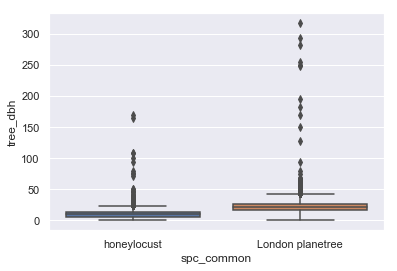

In [188]:
#boxplot of log(tree_dbh vs top 10 species)

#df_10.tree_dbh = np.log(df_10.tree_dbh)
ed_10 = eda(df_10.loc[df_10.status!= 'Stump',:])
ed_10.boxplot('spc_common', 'tree_dbh')

Text(0, 0.5, 'log tree diameter')

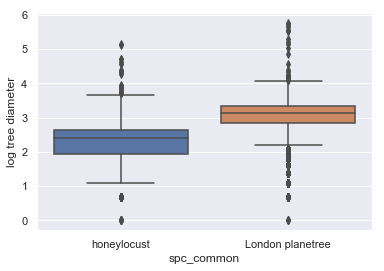

In [189]:
df_10.tree_dbh = np.log(df_10.tree_dbh+1)
ed_10 = eda(df_10.loc[df_10.status!= 'Stump',:])
ed_10.boxplot('spc_common', 'tree_dbh')
plt.ylabel('log tree diameter')

In [204]:
from scipy.stats import ttest_ind
ttest_ind(df_10.tree_dbh.loc[df_10.spc_common == "honeylocust"], 
          df_10.tree_dbh.loc[df_10.spc_common == "London planetree"],
          equal_var = True)


Ttest_indResult(statistic=-258.33265678621683, pvalue=0.0)

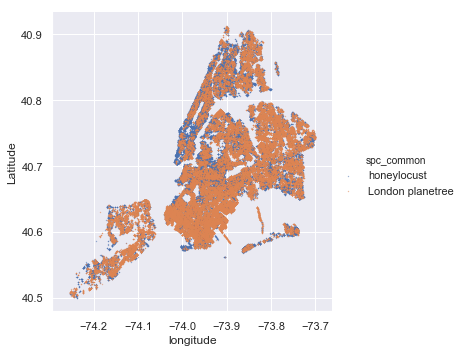

In [173]:
#geo-location of top 10 species, looks like there is clustering behavior 
#and some species only appear in certain area
#It might be possible to predict the type of species based on other variables
ed_10.plot('longitude', 'Latitude','spc_common')

In [174]:
X_10 = pd.concat([pd.get_dummies(df_10[['status', 'health',
       'steward', 'sidewalk', 'boroname','curb_loc']]), df_10[['longitude','Latitude','tree_dbh']]], axis = 1)

y_10 = df_10.spc_common

In [179]:
knn = KNeighborsClassifier(n_neighbors=5)
train_test(knn, X_10, y_10)

(0.16573015138494082, 0.9007219691600991)

In [180]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate = 1)
train_test(ada, X_10, y_10)

(0.15859059959013685, 0.9176699487551436)

In [181]:
# import os
# beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
# beep(3)

In [182]:
log = LogisticRegression()
train_test(log, X_10, y_10)

/Users/royluo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.21045151054406028, 0.8708595597309167)

In [200]:
top10_species = df['spc_common'].value_counts()[:10].index
df_10 = df.loc[df['spc_common'].apply(lambda x: True if x in top10_species else False),:]
df_10 = df_10.dropna()
df['spc_common'].value_counts()[:10]

London planetree     87014
honeylocust          64264
Callery pear         58931
pin oak              53185
Norway maple         34189
littleleaf linden    29742
cherry               29279
Japanese zelkova     29258
ginkgo               21024
Sophora              19338
Name: spc_common, dtype: int64

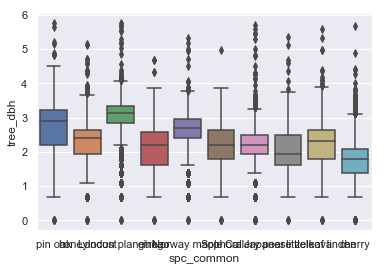

In [201]:
df_10.tree_dbh = np.log(df_10.tree_dbh+1)
ed_10 = eda(df_10.loc[df_10.status!= 'Stump',:])
ed_10.boxplot('spc_common', 'tree_dbh')

In [202]:
X_10 = pd.concat([pd.get_dummies(df_10[['status', 'health',
       'steward', 'sidewalk', 'boroname','curb_loc']]), df_10[['longitude','Latitude','tree_dbh']]], axis = 1)

y_10 = df_10.spc_common

train_test(knn, X_10, y_10, True)

'                   precision    recall  f1-score   support\n\n     Callery pear       0.38      0.54      0.44     11804\n Japanese zelkova       0.26      0.29      0.28      5977\n London planetree       0.58      0.69      0.63     17372\n     Norway maple       0.35      0.33      0.34      6783\n          Sophora       0.23      0.16      0.19      3852\n           cherry       0.38      0.36      0.37      5805\n           ginkgo       0.29      0.22      0.25      4178\n      honeylocust       0.40      0.39      0.40     12744\nlittleleaf linden       0.24      0.14      0.18      6048\n          pin oak       0.39      0.26      0.31     10675\n\n        micro avg       0.41      0.41      0.41     85238\n        macro avg       0.35      0.34      0.34     85238\n     weighted avg       0.39      0.41      0.39     85238\n'